In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_data = pd.read_csv('train.csv')
print(churn_data.shape)

churn_data.head()

(4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# The Target Variable

In [3]:
churn_data['churn'].value_counts() / len(churn_data)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

# The Variable Types

In [4]:
numerical_features = [feature for feature in churn_data.columns if churn_data[feature].dtype != 'O']
print("Total number of numerical features: ", len(numerical_features))

print(numerical_features)

Total number of numerical features:  15
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [5]:
categorical_features = [feature for feature in churn_data.columns if feature not in numerical_features and feature != 'churn']
print("Total number of categorical features: ", len(categorical_features))

print(categorical_features)

Total number of categorical features:  4
['state', 'area_code', 'international_plan', 'voice_mail_plan']


# Missing Features

## Numerical Features

In [6]:
churn_data[numerical_features].isnull().sum()

account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

## Categorical Features

In [7]:
churn_data[categorical_features].isnull().sum()

state                 0
area_code             0
international_plan    0
voice_mail_plan       0
dtype: int64

# Numerical Features

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>],
       [<AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>],
       [<AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>],
       [<AxesSubplot:title={'center':'total_intl_calls'}>,
        <AxesSubplot:title={'center':'total_intl_charge'}>,
        <AxesSubplot:title={'center':'number_customer_service_calls'}>,
        <AxesSubplot:>]], dtype=object)

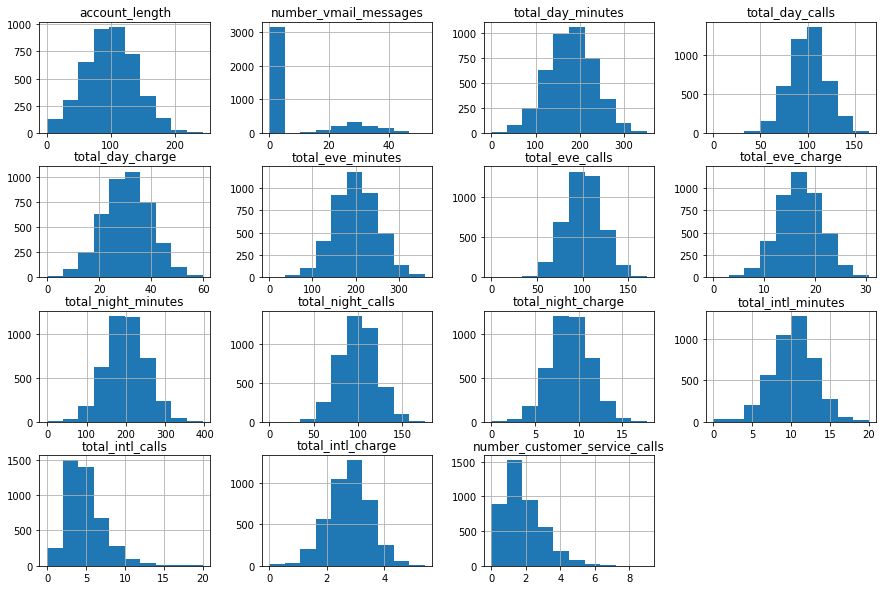

In [8]:
churn_data[numerical_features].hist(figsize=(15, 10))

<AxesSubplot:xlabel='number_vmail_messages', ylabel='account_length'>

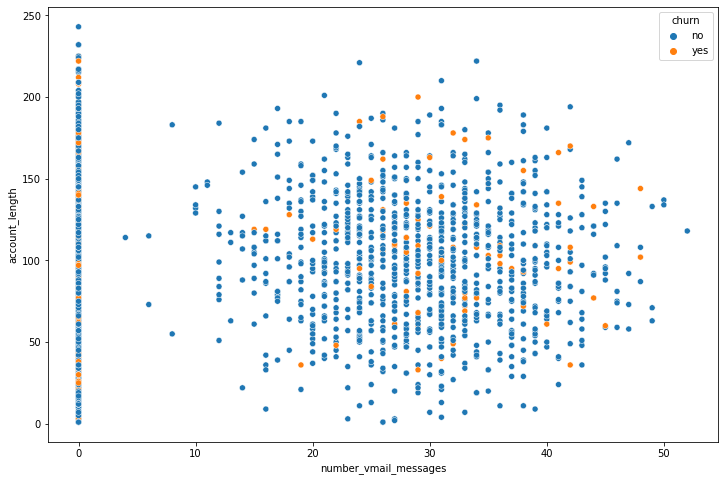

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = churn_data, x = 'number_vmail_messages', y = 'account_length', hue='churn')

<AxesSubplot:xlabel='number_vmail_messages', ylabel='account_length'>

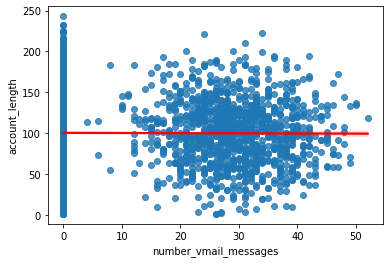

In [10]:
sns.regplot(data = churn_data, x = 'number_vmail_messages', y = 'account_length', line_kws={'color': 'red'})

<AxesSubplot:>

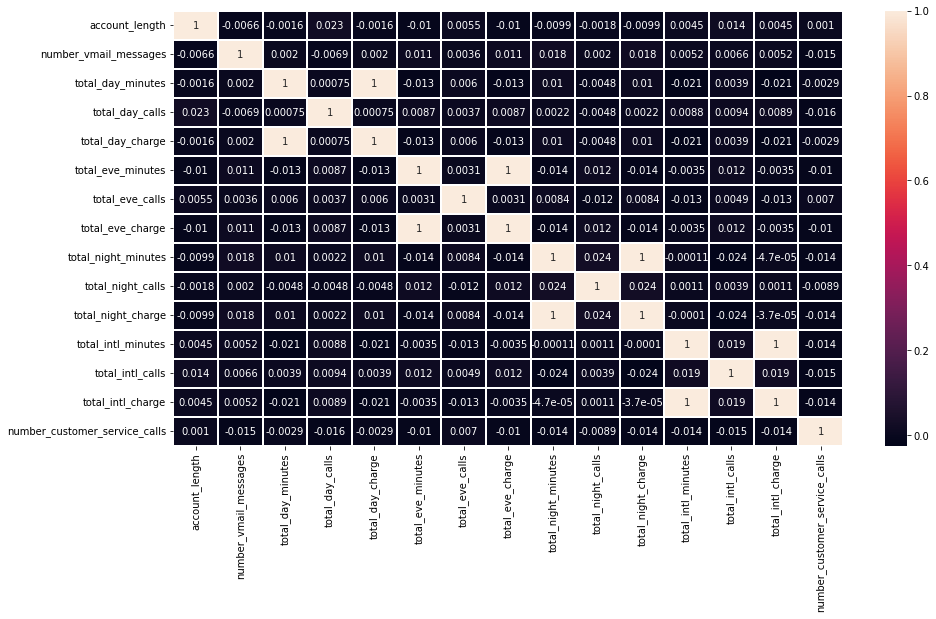

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(churn_data.corr(), annot = True, linewidths= 0.3)

In [12]:
churn_data[['total_day_charge', 'total_day_minutes']]

,total_day_charge,total_day_minutes
0,27.47,161.6
1,41.38,243.4
2,50.90,299.4
3,28.34,166.7
4,37.09,218.2
...,...,...
4245,32.01,188.3
4246,30.24,177.9
4247,29.02,170.7
4248,40.07,235.7


In [13]:
churn_data['area_code_num'] = churn_data['area_code'].apply(lambda x: int(x[-3:]))

In [14]:
churn_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_num
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,415
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,415
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,408
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,415
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,510


<AxesSubplot:>

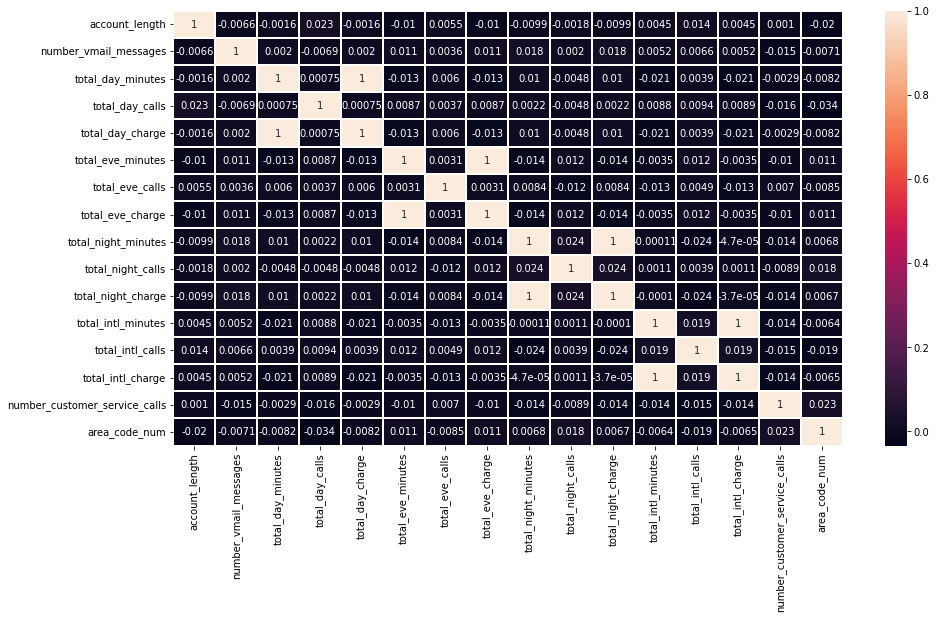

In [15]:
plt.figure(figsize=(15, 8))

sns.heatmap(churn_data.corr(), annot=True, linewidths=0.3)

# Categorical Features

In [16]:
churn_data[categorical_features]

,state,area_code,international_plan,voice_mail_plan
0,OH,area_code_415,no,yes
1,NJ,area_code_415,no,no
2,OH,area_code_408,yes,no
3,OK,area_code_415,yes,no
4,MA,area_code_510,no,yes
...,...,...,...,...
4245,MT,area_code_415,no,no
4246,WV,area_code_408,no,no
4247,NC,area_code_408,no,no
4248,HI,area_code_408,no,yes


<AxesSubplot:xlabel='state', ylabel='count'>

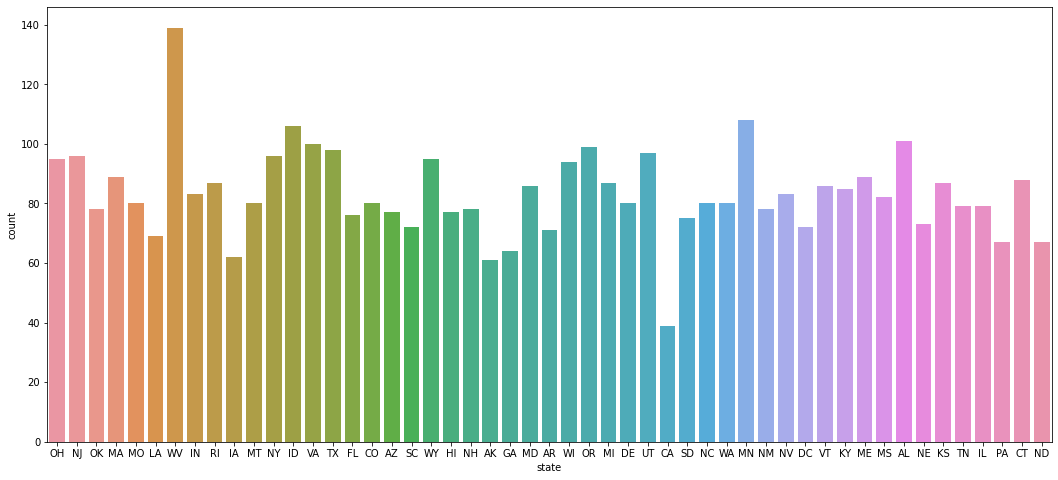

In [17]:
plt.figure(figsize=(18, 8))
sns.countplot(data = churn_data, x = 'state')

<AxesSubplot:xlabel='state', ylabel='count'>

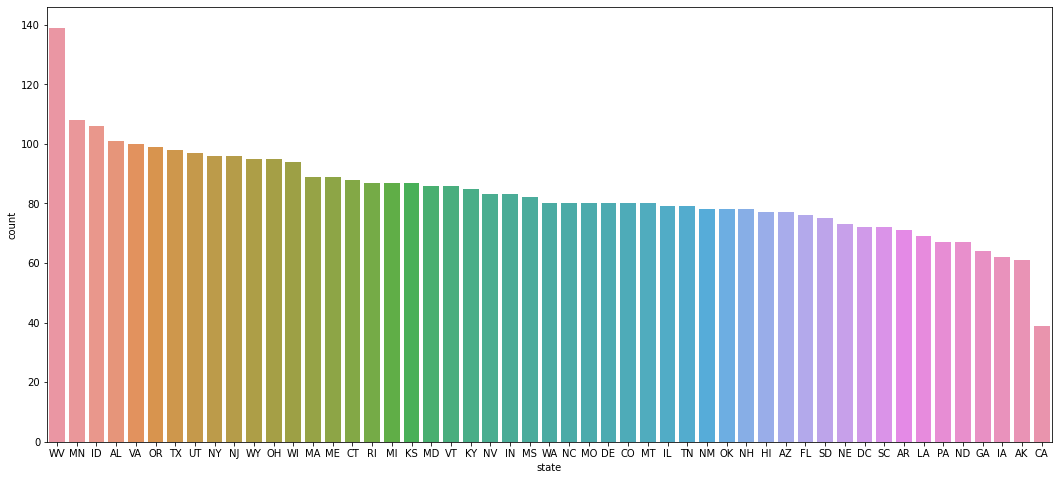

In [18]:
plt.figure(figsize=(18, 8))
sns.countplot(data = churn_data, x = 'state', order=churn_data['state'].value_counts(ascending=False).index.to_list())

<AxesSubplot:xlabel='international_plan', ylabel='count'>

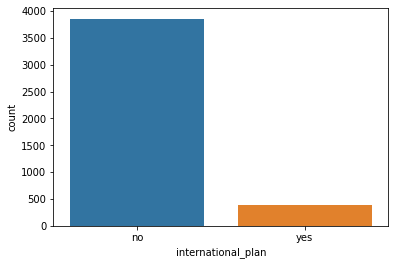

In [23]:
sns.countplot(data=churn_data, x='international_plan')

<AxesSubplot:xlabel='international_plan', ylabel='count'>

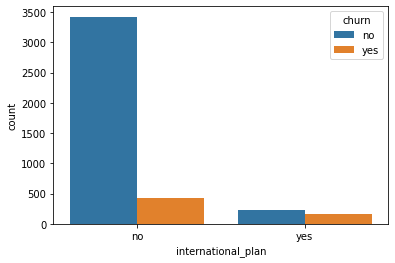

In [24]:
sns.countplot(data=churn_data, x='international_plan', hue='churn')

<AxesSubplot:xlabel='area_code', ylabel='count'>

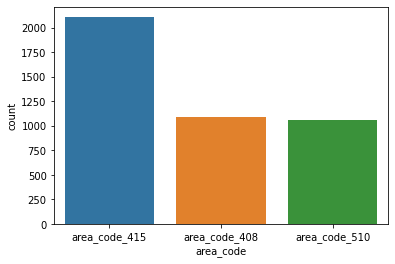

In [25]:
sns.countplot(data=churn_data, x='area_code')

<AxesSubplot:xlabel='area_code', ylabel='count'>

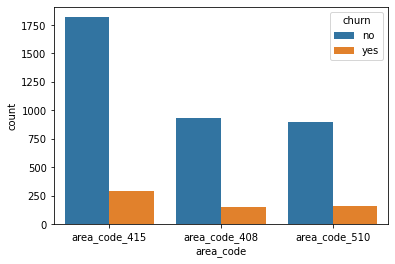

In [26]:
sns.countplot(data=churn_data, x='area_code', hue='churn')

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

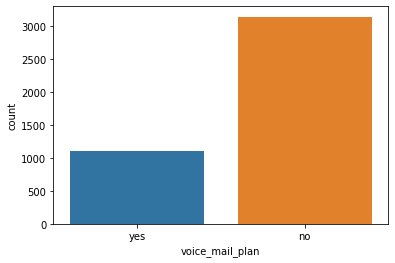

In [27]:
sns.countplot(data=churn_data, x='voice_mail_plan')

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

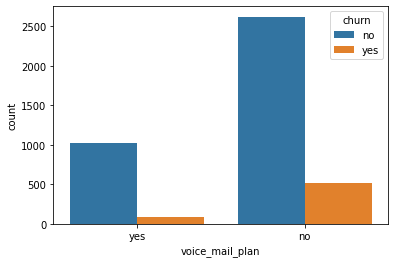

In [28]:
sns.countplot(data=churn_data, x='voice_mail_plan', hue='churn')